In [1]:
import re

In [2]:
# read file
with open("Antineoplastics.R","r") as file:
    lines = file.readlines()

In [4]:
#temp_column = re.finditer(r'\w*\$[\w|`|ç|ã|á|ó|é|\s]*',l)
#temp_column

In [6]:
#c.string[c.start():c.end()]

In [7]:
assignment_list  = []
column_assignment = []
for l in lines:
    column_iter = re.finditer(r'\w*\$[\w|`|ç|ã|á|ó|é|\s]*',l)
    is_assignment = l.find("<-")
    left = []
    right = []
    if is_assignment>=0:
        for c in column_iter:  
            if c.start() > is_assignment:
                right.append(c.string[c.start():c.end()].replace('\n',''))
            else:
                left.append(c.string[c.start():c.end()].replace('\n',''))
            # if there is no column assignment, might be a data/variable assignment
            if len(left)==0:
                left.append(l[0:is_assignment].strip())
            column_assignment.append((l,left,right))           
        if len(right)==0:
            right.append(l[is_assignment+2:].strip())
            assignment_list.append((l,left,right))
    #column_set.update(x)

In [8]:
column_assignment

[('toconsider<-Catalog[which(Catalog$`Therapeutic Area`==TerapeuticArea),]\n',
  ['toconsider'],
  ['Catalog$`Therapeutic Area`']),
 ('DataProv<-DataProv[!grepl("ACESSÓRIO",DataProv$`Descrição\xa0CATMAT`),]\n',
  ['DataProv'],
  ['DataProv$`Descrição\xa0CATMAT`']),
 ('DataProv<-DataProv[!grepl("CANETA",DataProv$`Descrição\xa0CATMAT`),]\n',
  ['DataProv'],
  ['DataProv$`Descrição\xa0CATMAT`']),
 ('DataProv<-DataProv[!grepl("NUTRIÇÃO",DataProv$`Descrição\xa0CATMAT`),]\n',
  ['DataProv'],
  ['DataProv$`Descrição\xa0CATMAT`']),
 ('DataProv$`Descrição\xa0CATMAT`<-str_replace_all(DataProv$`Descrição\xa0CATMAT`,"0,","0.")\n',
  ['DataProv$`Descrição\xa0CATMAT`'],
  ['DataProv$`Descrição\xa0CATMAT`']),
 ('DataProv$`Descrição\xa0CATMAT`<-str_replace_all(DataProv$`Descrição\xa0CATMAT`,"0,","0.")\n',
  ['DataProv$`Descrição\xa0CATMAT`'],
  ['DataProv$`Descrição\xa0CATMAT`']),
 ('DataProv$`Descrição\xa0CATMAT`<-str_replace_all(DataProv$`Descrição\xa0CATMAT`,"1,","1.")\n',
  ['DataProv$`Descrição\x

In [16]:
import networkx as nx

col_dep_graph = nx.DiGraph()

for ca in column_assignment:
    for r in ca[2]:
        for l in ca[1]:
            col_dep_graph.add_edge(r,l)
            
# add relation to the root of the dataset
temp_edge = []
for coln in col_dep_graph.nodes():
    coln_split = coln.split("$")
    if len(coln_split) > 1:
        temp_edge.append((coln,coln_split[0]))

for t in temp_edge:
    col_dep_graph.add_edge(t[0],t[1])

In [17]:
col_dep_graph.nodes

NodeView(('Catalog$`Therapeutic Area`', 'toconsider', 'DataProv$`Descrição\xa0CATMAT`', 'DataProv', 'NA', 'DataProv$NomCatalog', 'DataProv$Dist', 'DataProv$NomProducto', 'DataProv$NomConcentracion', 'DataProv$Ano', 'DataProv$Metodos', 'Single', 'Single$`Descrição\xa0CATMAT`', 'Falta', 'FixedDose', 'Single$Primer', 'Falta$Primer', 'FixedDose$Primer', 'Single$Segundo', 'Falta$Segundo', 'FixedDose$Segundo', 'Single$Concentracion1', 'Single$Concentracion2', 'Falta$Concentracion1', 'Falta$Concentracion2', 'FixedDose$Concentracion1', 'FixedDose$Concentracion2', 'Falta$`Descrição\xa0CATMAT`', 'FixedDose$`Descrição\xa0CATMAT`', '50', 'SingleNom$Distance', 'DatosBr$Catalog1', 'DatosBr$Dist1', 'DatosBr$Catalog2', 'DatosBr$Dist2', 'toconsider$Primer', 'DatosBr$Primer', 'Empiezan', 'toconsider$Segundo', 'DatosBr$Segundo', '"Not Found"', 'toconsider$`Product Name`', 'a', 'b', 'DatosBr$NomCatalog', '"CISPLATIN 50 MG, POWDER FOR INJECTION, 50 ML VIAL, 1X1"', 'DatosBr$`Descrição\xa0CATMAT`', '"RITUXIM

In [18]:
column_index = {x:str(i) for i,x in enumerate(col_dep_graph.nodes())}
column_label = {str(i):x for i,x in enumerate(col_dep_graph.nodes())}

In [21]:
normalize_graph = nx.DiGraph()

for ca in column_assignment:
    for r in ca[2]:
        for l in ca[1]:
            normalize_graph.add_edge(str(column_index[r]),str(column_index[l]))
            
for t in temp_edge:
    normalize_graph.add_edge(str(column_index[t[0]]),str(column_index[t[1]]))

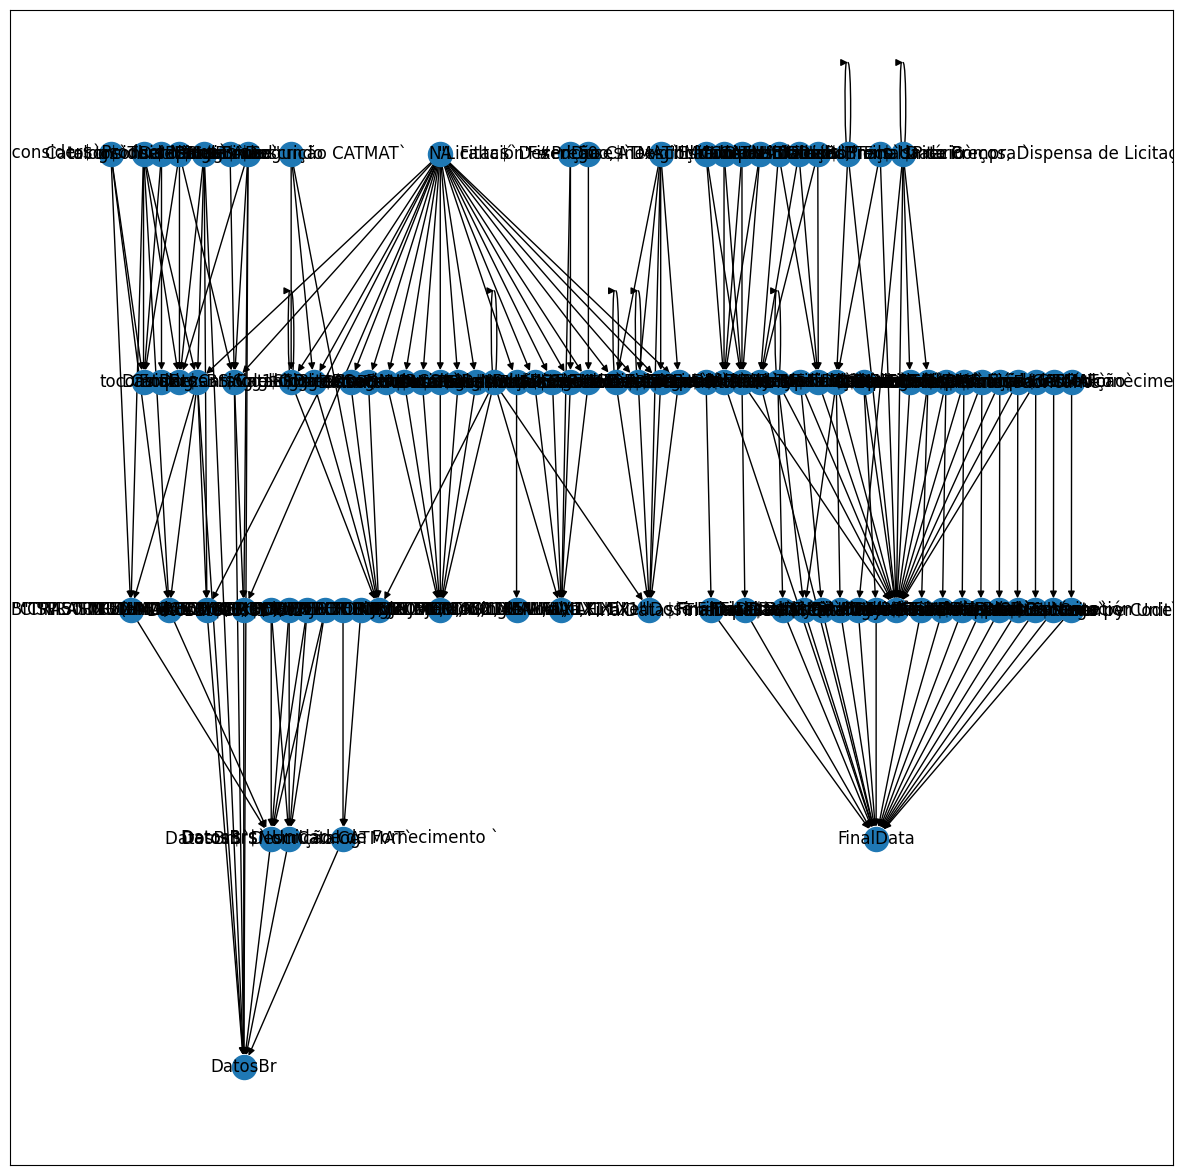

In [22]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,15))
pos = nx.nx_pydot.graphviz_layout(normalize_graph,'dot')
nx.draw_networkx(normalize_graph,pos=pos,labels=column_label)

In [23]:
nx.drawing.nx_pydot.write_dot(col_dep_graph, 'bra_dep_graph_2.dot')


In [83]:
#import graphviz as gv
#nx.drawing.nx_pydot.write_dot(col_dep_graph, 'bra_dep_graph.dot')
#gv.render('dot', 'png', 'networkx_graph.png')

In [24]:
# read file
with open("Chile-Cenabast Mapping.R","r") as file:
    lines = file.readlines()

In [25]:
temp_column = re.finditer(r'\w*\$[\w|`|ç|ã|á|ó|é|\s]*',l)
temp_column

In [26]:
c.string[c.start():c.end()]

'DatosBrFinal$`\xa0Unidade de Fornecimento\xa0`\n'

In [27]:
assignment_list  = []
column_assignment = []
for l in lines:
    column_iter = re.finditer(r'\w*\$[\w|`|ç|ã|á|ó|é|\s]*',l)
    is_assignment = l.find("<-")
    left = []
    right = []
    if is_assignment>=0:
        for c in column_iter:  
            if c.start() > is_assignment:
                right.append(c.string[c.start():c.end()].replace('\n',''))
            else:
                left.append(c.string[c.start():c.end()].replace('\n',''))
            # if there is no column assignment, might be a data/variable assignment
            if len(left)==0:
                left.append(l[0:is_assignment].strip())
            column_assignment.append((l,left,right))           
        if len(right)==0:
            right.append(l[is_assignment+2:].strip())
            assignment_list.append((l,left,right))
    #column_set.update(x)

In [28]:
column_assignment

[('CHL<-CHL[which(CHL$Proveedor!="PAN AMERICAN HEALTH ORGANIZATION"),]\n',
  ['CHL'],
  ['CHL$Proveedor']),
 ('Prices_2019_2021<-Prices_2019_2021[!is.na(Prices_2019_2021$`Product Name`) & !is.na(Prices_2019_2021$`Min Unit Cost`),c(4,8)]\n',
  ['Prices_2019_2021'],
  ['Prices_2019_2021$`Product Name`', 'Prices_2019_2021$`Min Unit Cost`']),
 ('Prices_2019_2021<-Prices_2019_2021[!is.na(Prices_2019_2021$`Product Name`) & !is.na(Prices_2019_2021$`Min Unit Cost`),c(4,8)]\n',
  ['Prices_2019_2021'],
  ['Prices_2019_2021$`Product Name`', 'Prices_2019_2021$`Min Unit Cost`']),
 ('SingleDose<-CHL$`Nombre producto genérico`[grepl("\\\\/",CHL$`Nombre producto genérico`)]\n',
  ['SingleDose'],
  ['CHL$`Nombre producto genérico`', 'CHL$`Nombre producto genérico`']),
 ('SingleDose<-CHL$`Nombre producto genérico`[grepl("\\\\/",CHL$`Nombre producto genérico`)]\n',
  ['SingleDose'],
  ['CHL$`Nombre producto genérico`', 'CHL$`Nombre producto genérico`']),
 ('NewEntries2$`Product Name`<-NewEntries$`Catalog

In [30]:
import networkx as nx

col_dep_graph = nx.DiGraph()

for ca in column_assignment:
    for r in ca[2]:
        for l in ca[1]:
            col_dep_graph.add_edge(r,l)

            import networkx as nx

# add relation to the root of the dataset
temp_edge = []
for coln in col_dep_graph.nodes():
    coln_split = coln.split("$")
    if len(coln_split) > 1:
        temp_edge.append((coln,coln_split[0]))

for t in temp_edge:
    col_dep_graph.add_edge(t[0],t[1])

In [31]:
column_index = {x:str(i) for i,x in enumerate(col_dep_graph.nodes())}
column_label = {str(i):x for i,x in enumerate(col_dep_graph.nodes())}

In [32]:
normalize_graph = nx.DiGraph()

for ca in column_assignment:
    for r in ca[2]:
        for l in ca[1]:
            normalize_graph.add_edge(str(column_index[r]),str(column_index[l]))
            
for t in temp_edge:
    normalize_graph.add_edge(str(column_index[t[0]]),str(column_index[t[1]]))

In [33]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,15))
pos = nx.nx_pydot.graphviz_layout(normalize_graph,'dot')
#nx.draw_networkx(normalize_graph,pos=pos,labels=column_label)

<Figure size 1500x1500 with 0 Axes>

In [34]:
#import graphviz as gv
nx.drawing.nx_pydot.write_dot(col_dep_graph, 'chl_dep_graph_2.dot')
#gv.render('dot', 'png', 'networkx_graph.png')

In [96]:
!dot -Tpdf chl_dep_graph.dot > chl_dep_graph.pdf

In [35]:
# read file
with open("PeruAnitneoplasticsFeb22.R","r") as file:
    lines = file.readlines()

In [36]:
temp_column = re.finditer(r'\w*\$[\w|`|ç|ã|á|ó|é|\s]*',l)
temp_column

In [37]:
c.string[c.start():c.end()]

'CHLFinal$`Country Product Name`'

In [38]:
assignment_list  = []
column_assignment = []
for l in lines:
    column_iter = re.finditer(r'\w*\$[\w|`|ç|ã|á|ó|é|\s]*',l)
    is_assignment = l.find("<-")
    left = []
    right = []
    if is_assignment>=0:
        for c in column_iter:  
            if c.start() > is_assignment:
                right.append(c.string[c.start():c.end()].replace('\n',''))
            else:
                left.append(c.string[c.start():c.end()].replace('\n',''))
            # if there is no column assignment, might be a data/variable assignment
            if len(left)==0:
                left.append(l[0:is_assignment].strip())
            column_assignment.append((l,left,right))           
        if len(right)==0:
            right.append(l[is_assignment+2:].strip().replace(":","\x047"))
            assignment_list.append((l,left,right))
    #column_set.update(x)

In [39]:
column_assignment

[('toconsider<-Catalog[which(Catalog$`Therapeutic Area`=="Antineoplastics"),]\n',
  ['toconsider'],
  ['Catalog$`Therapeutic Area`']),
 ('  primer<-unlist(str_split(toconsider$`Product Name`[i], ","))[1]\n',
  ['primer'],
  ['toconsider$`Product Name`']),
 ('  DatosFinal$Nombre[i]<-unlist(str_split(primer," " ))[1]\n',
  ['DatosFinal$Nombre'],
  ['unlist(str_split(primer," " ))[1]']),
 ('  DatosFinal$Concentracion[i]<-paste(unlist(str_split(primer," " ))[2],unlist(str_split(primer," " ))[3])\n',
  ['DatosFinal$Concentracion'],
  ['paste(unlist(str_split(primer," " ))[2],unlist(str_split(primer," " ))[3])']),
 ('    #DatosFinal$Nombre[i]<-paste(unlist(str_split(primer," " ))[1],unlist(str_split(primer," " ))[2])\n',
  ['DatosFinal$Nombre'],
  ['paste(unlist(str_split(primer," " ))[1],unlist(str_split(primer," " ))[2])']),
 ('    DatosFinal$Concentracion[i]<-paste(unlist(str_split(stringi," " ))[3],unlist(str_split(stringi," " ))[4])\n',
  ['DatosFinal$Concentracion'],
  ['paste(unlist(s

In [40]:
import networkx as nx

col_dep_graph = nx.DiGraph()

for ca in column_assignment:
    for r in ca[2]:
        for l in ca[1]:
            col_dep_graph.add_edge(r,l)

# add relation to the root of the dataset
temp_edge = []
for coln in col_dep_graph.nodes():
    coln_split = coln.split("$")
    if len(coln_split) > 1:
        temp_edge.append((coln,coln_split[0]))

for t in temp_edge:
    col_dep_graph.add_edge(t[0],t[1])

In [41]:
col_dep_graph.nodes

NodeView(('Catalog$`Therapeutic Area`', 'toconsider', 'toconsider$`Product Name`', 'primer', 'unlist(str_split(primer," " ))[1]', 'DatosFinal$Nombre', 'paste(unlist(str_split(primer," " ))[2],unlist(str_split(primer," " ))[3])', 'DatosFinal$Concentracion', 'paste(unlist(str_split(primer," " ))[1],unlist(str_split(primer," " ))[2])', 'paste(unlist(str_split(stringi," " ))[3],unlist(str_split(stringi," " ))[4])', 'DatosFinal$Presentacion', 'DatosFinal$Cuarto', 'DatosFinal$Quinto', 'toconsider$Taxonomy', 'DatosFinal$Taxonomy', 'DatosFinal$CatalogName', 'DatosFinal$ConcentracionNum', 'NA', 'PeruMed$NomCatalog', 'PeruMed$Dist', 'PeruMed$NomProducto', 'PeruMed$NomConcentracion', 'PeruMed$Ano', 'PeruMed$Metodos', 'PeruMed$Producto', 'PeruMed$`Identificación Proceso`', 'Empiezan', 'stringi', 'paste(unlist(str_split(stringi," "))[3],unlist(str_split(stringi," "))[4])', 'str_extract(unlist(str_split(stringi," "))[3],"[[\x047digit\x047]]+\\\\.*[[\x047digit\x047]]*")', '"Subasta Inversa Electrónic

In [42]:
column_index = {x:str(i) for i,x in enumerate(col_dep_graph.nodes())}
column_label = {str(i):x for i,x in enumerate(col_dep_graph.nodes())}

In [43]:
normalize_graph = nx.DiGraph()

for ca in column_assignment:
    for r in ca[2]:
        for l in ca[1]:
            normalize_graph.add_edge(str(column_index[r]),str(column_index[l]))
            
for t in temp_edge:
    normalize_graph.add_edge(str(column_index[t[0]]),str(column_index[t[1]]))

/home/deck/anaconda3/envs/jupyter/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 4 () missing from current font.
  func(*args, **kwargs)
/home/deck/anaconda3/envs/jupyter/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 4 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


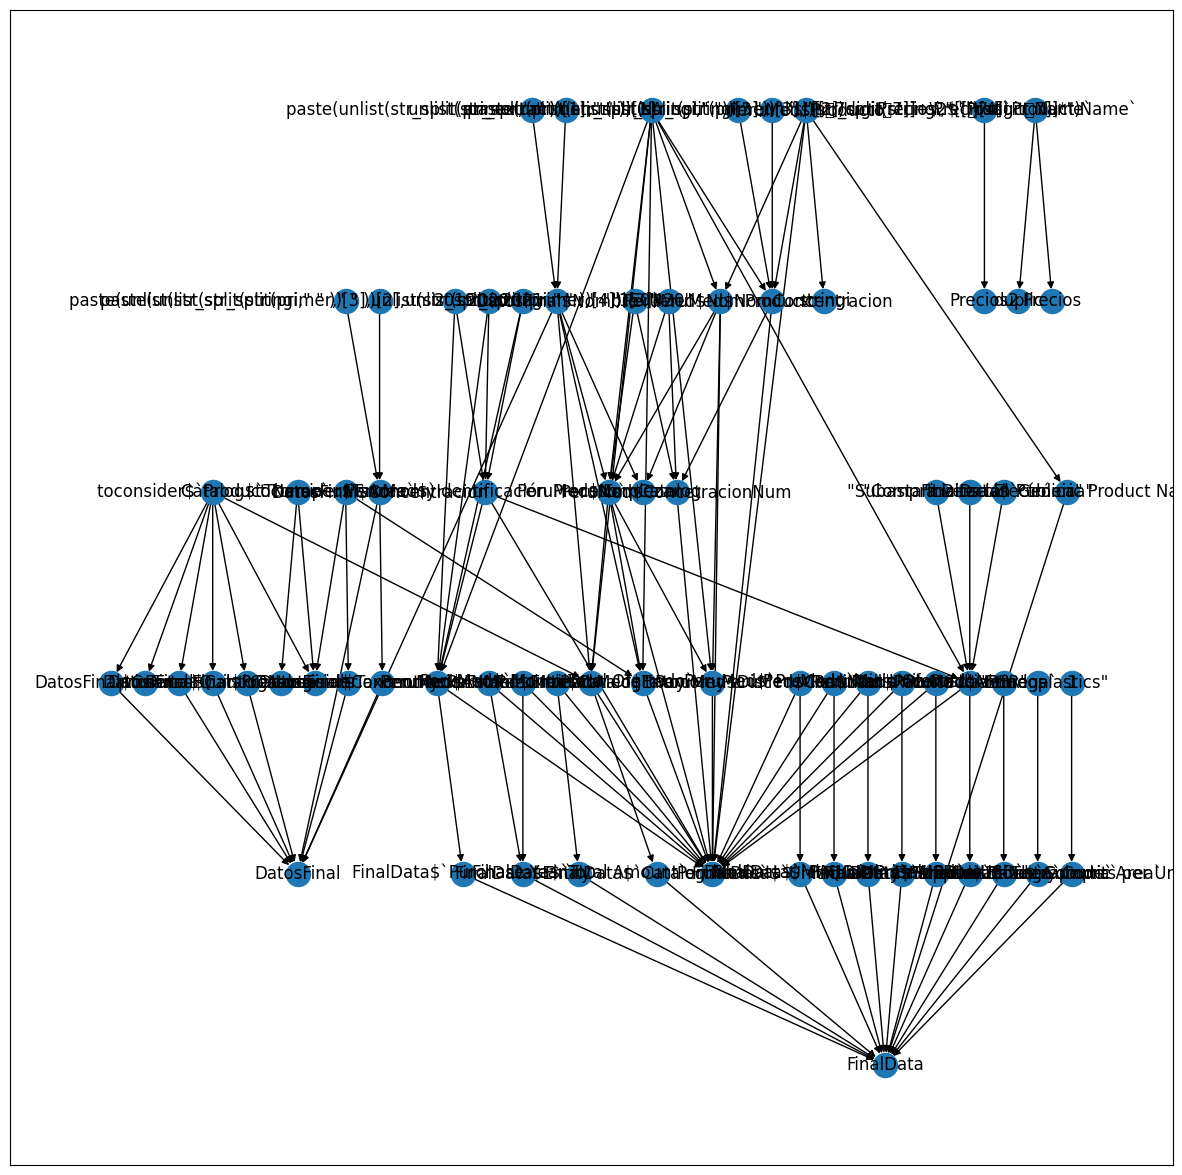

In [46]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,15))
pos = nx.nx_pydot.graphviz_layout(normalize_graph,'dot')
nx.draw_networkx(normalize_graph,pos=pos,labels=column_label)

In [47]:
#import graphviz as gv
nx.drawing.nx_pydot.write_dot(col_dep_graph, 'per_dep_graph_2.dot')
#gv.render('dot', 'png', 'networkx_graph.png')

In [48]:
!dot -Tpdf per_dep_graph_2.dot > per_dep_graph_2.pdf